# <center><h1><font color="red">Titanic</font></h1></center>

<center><img src="https://static3.thetravelimages.com/wordpress/wp-content/uploads/2018/11/titanic1-e1542497861799.jpg" height=500 /></center>

<h1> History</h1>

**Titanic** is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the **Titanic** sank after colliding with an iceberg, killing *1502* out of *2224* passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.<br><br>

<h3>If you are using the kaggle first time</h3>
This github link is for 
<a href='https://github.com/vikramvinay/Titanic-Machine-Learning-from-Disaster'>Beginners  who try first time kaggle</a>

In this github link i  basically explains all the thing that i did when i begin first time with kaggle .So this one just gives you the kind of connect that you need when you begin with kaggle. It will also enhance your knowledge.

To use this github repository fork it and use it and try to gain most of it.

<center><h3>From now onward we will follow below TOC points</h3></center>

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
    - 2.1  [Loading the data files](#section201)<br/>
    - 2.2 [Data Description](#section202)<br/>
3. [Cleaning the data](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Why missing values treatment is required?](#section302)<br/>
    - 3.3 [Dealing with Missing values](#section303)<br/>
    - 3.4 [Transforming Sex](#section304)<br/>
    - 3.5 [Treating Missing age](#section305)<br/>
4. [Exploratory data analysis](#section4)
    - 4.1 [Correlation Matrix and Heatmap](#section401)<br/>
    - 4.2 [Gender and Survived](#section402)<br/>
    - 4.3 [Pclass and Survived](#section403)<br/>
    - 4.4 [Fare and Survived](#section404)<br/>
    - 4.5 [Age and Survived](#section405)<br/>
5. [Feature Engineering](#section5)<br/>  
    - 5.1 [family_size feature](#section501)<br/>
    - 5.2 [Is_alone feature](#section502)<br/>
    - 5.3 [Child feature](#section503)<br/>
    - 5.4 [fare feature](#section504)<br/>
    - 5.5 [Calculated_fare feature](#section505)<br/>
    - 5.6 [Creating dummy variables](#section506)<br/>
6. [Model Creation](#section6)<br/>
    - 6.1 [Classifier Comparision](#section601)<br/>
    - 6.2 [LogisticRegression](#section602)<br/>
    - 6.3 [AdaBoostClassifer](#section603)<br/>
    - 6.4 [XGBClassifier](#section604)<br/>
    - 6.5 [DecisionTree Classifier](#section605)<br/>
    - 6.6 [Random Forest Classifier](#section606)<br/>
    - 6.7 [Bagging Classifier](#section607)<br/>
    - 6.8 [Voting Classifier](#section608)<br/>
7. [Submit test predictions](#section7)<br/>

Remember the <font color='red'>Upvote button</font> is next to the fork button and if you wants further updates of my notebooks <font color='red'>Click Follow</font> , and it's free too! ;)

<a id="section1"></a>
### 1. Problem Statement


In this challenge, we need to complete the __analysis__ of what sorts of people were likely to __survive__. In particular,  we apply the tools of __machine learning__ to predict which passengers survived the tragedy

- Predict whether passenger gonna __survive or not__.

<a id="section2"></a>
### 2. Data Loading and Description

In [1]:
# importing libraires
%matplotlib inline                 

import pandas as pd                # Implemennts milti-dimensional array and matrices
import numpy as np                 # For data manipulation and analysis
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()



from catboost import CatBoostClassifier   # import algorithms for model training 

<a id="section201"></a>
#### 2.1  Loading the data files 

In [2]:
from sklearn.preprocessing import Imputer

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="section202"></a>
#### 2.2 Data Description

The data has been split into two groups:
- training set (train.csv)
- test set(test.csv)
<br>

The training set includes passengers survival status(also know as the ground truth from the titanic tragedy) which along with other features like gender, class, fare and pclass is used to create machine learning model.
<br><br>
The test set should be used to see how well my model performs on unseen data. The test set does not provide passengers survival status. We are going to use our model to predict passenger survival status.
<br><br>

Lets describe whats the meaning of the features given the both train & test datasets.
<h4>Variable Definition Key.</h4>
- Survival
 - 0= No
 - 1= Yes
- pclass (Ticket class)
 - 1=1st
 - 2=2nd
 - 3=3rd
 
- sex
<br>

- age


- sibsp (# of siblings / spouses aboard the Titanic)
<br>
- parch (# of parents / children aboard the Titanic)
<br>
- tickets
<br>
- fare
<br>
- cabin
- embarked Port of Embarkation.
 - C = Cherbourg,
 - Q = Queenstown,
 - S = Southampton
- pclass: A proxy for socio-economic status (SES)
<br>
<h4>This is important to remember and will come in handy for later analysis.</h4>
 - 1st = Upper
 - 2nd = Middle
 - 3rd = Lower


| Column Name                       | Description                                                                                        |
| ----------------------------------|:--------------------------------------------------------------------------------------------------:|
| PassengerId                       | Passenger Identity                                                                                                   | 
| Survived                          | Whether passenger survived or not                                                                  | 
| Pclass                            | Class of ticket                                                                                    | 
| Name                              | Name of passenger                                                                                  | 
| Sex                               | Sex of passenger                                                                                   |
| Age                               | Age of passenger                                                                                   |
| SibSp                             | Number of sibling and/or spouse travelling with passenger                                          |
| Parch                             | Number of parent and/or children travelling with passenger                                         |
| Ticket                            | Ticket number                                                                                      |
| Fare                              | Price of ticket                                                                                    |
| Cabin                             | Cabin number                                                                                       |

<a id="section3"></a>
### 3. Cleaning the data

It looks like this dataset is quite organized, however, before using this dataset for analyzing and visualizing we need to deal with ..
- Different variables
- Null values

__Different variables present in the datasets__
 - **There are four type of variables**
  - **Numerical Features**: Age, Fare, SibSp and Parch
  - **Categorical Features**: Sex, Embarked, Survived and Pclass
  - **Alphanumeric Features**: Ticket and Cabin(Contains both alphabets and the numeric value)
  - **Text Features**: Name

- We really need to tweak these features so we get the desired form of input data

We see Age  and Cabin have a lot of missing value.So First we need to deal with all these NaN values.
- As in Cabin column about 1\3rd of the values are missing.So we get rid of this column. 
<br>


<a id="section302"></a>
#### 3.2  Why missing values treatment is required?

__Missing data__ in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to __wrong prediction__ or __classification__.


In [3]:
#As test has only one missing value so lets fill it..
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
data_df = train_df.append(test_df) # The entire data: train + test.
passenger_id=test_df['PassengerId']

## We will drop PassengerID and Ticket since it will be useless for our data. 
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(418, 10)

<a id="section303"></a>
#### 3.3 Dealing with Missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
********************
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
dtype: int64


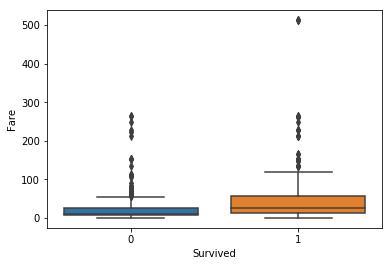

In [4]:
print (train_df.isnull().sum())
print (''.center(20, "*"))
print (test_df.isnull().sum())
sns.boxplot(x='Survived',y='Fare',data=train_df)

<a id="section304"></a>
#### 3.4 Transforming Sex

In [5]:
train_df=train_df[train_df['Fare']<400]

In [6]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)

In [7]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [8]:
pd.options.display.max_columns = 99
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<a id="section305"></a>
#### 3.5 Treating Missing age

#### <font color="red">Edit</font> 
- After ```Ken Lim``` __Suggestion__: Check in the __comment section__  

In [9]:
for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)


mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

In [10]:
data_df.groupby('Title')['Age'].median()

Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       36.0
Rev       41.5
Name: Age, dtype: float64

In [11]:
# imputing with the mean() strategy.

for name_string in data_df['Name']:
    data_df['Title']=data_df['Name'].str.extract('([A-Za-z]+)\.',expand=True)
    
#replacing the rare title with more common one.
# here the mapping for different title is done through finding relation between two columns. (Sex,Title)

#pd.crosstab(data_train['Title'],data_train['Sex']) (try this out)

mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
data_df.replace({'Title': mapping}, inplace=True)

data_df['Title'].value_counts()
train_df['Title']=data_df['Title'][:891]
test_df['Title']=data_df['Title'][891:]

titles=['Mr','Miss','Mrs','Master','Rev','Dr']
for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].mean()[titles.index(title)]
    #print(age_to_impute)
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
data_df.isnull().sum()



train_df['Age']=data_df['Age'][:891]
test_df['Age']=data_df['Age'][891:]
test_df.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
Embarked      0
Title         0
dtype: int64

<a id="section4"></a>
### 4.Exploratory data analysis
![](http://media.giphy.com/media/m3UHHYejQ4rug/giphy.gif)

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [12]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.647523,30.383851,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,14.875196,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,43.571429,1.000000,0.000000,30.771850
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


In [13]:
train_df.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,32.431252,0.553734,0.329690,22.117887
1,1.958702,0.315634,27.068147,0.477876,0.466077,44.289799


In [14]:
train_df.groupby('Sex').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
0,0.741214,2.162939,24.811705,0.696486,0.651757,42.985091
1,0.186087,2.394783,33.417036,0.431304,0.234783,23.830658



There are a couple of points that should be noted from the statistical overview. They are..
- About the survival rate, only 38% passenger survived during that tragedy.
- About the survival rate for genders, 74% female passengers survived, while only 19% male passengers survived.

<a id="section401"></a>
#### 4.1 Correlation Matrix and Heatmap

In [15]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.334068,-0.545899,-0.175255,-0.033395,0.082157,0.261742
Pclass,-0.334068,1.000000,0.132881,-0.289341,0.080937,0.018212,-0.604960
Sex,-0.545899,0.132881,1.000000,0.276530,-0.114799,-0.247003,-0.222361
Age,-0.175255,-0.289341,0.276530,1.000000,-0.262270,-0.203432,0.056003
SibSp,-0.033395,0.080937,-0.114799,-0.262270,1.000000,0.415141,0.211816
Parch,0.082157,0.018212,-0.247003,-0.203432,0.415141,1.000000,0.263910
Fare,0.261742,-0.604960,-0.222361,0.056003,0.211816,0.263910,1.000000


Text(0.5, 1.0, 'Correlations Among Features')

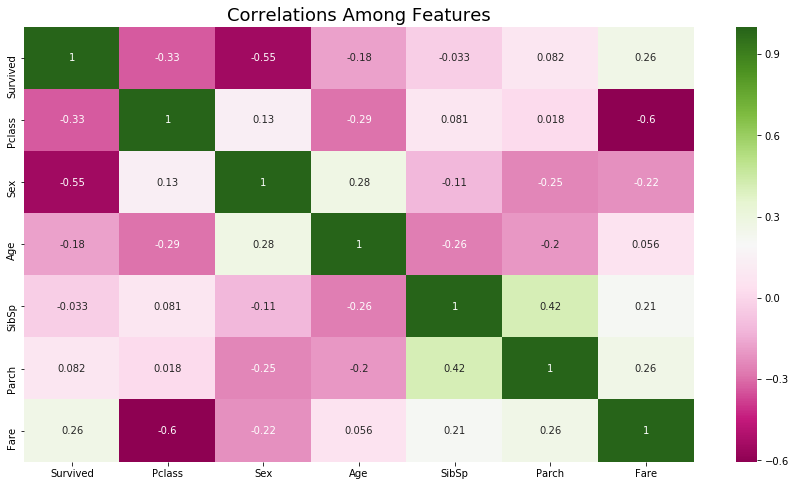

In [16]:
plt.subplots(figsize = (15,8))
sns.heatmap(train_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 18)

**Positive Correlation Features:**
- Fare and Survived: 0.26.

There is a positive correlation between Fare and Survived rated. This can be explained by saying that, the passenger who paid more money for their ticket were more likely to survive. 

**Negative Correlation Features:**
- Fare and Pclass: -0.55
 - This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). 
- Gender and Survived: -0.54
 - Basically is the info of whether the passenger was male or female.
- Pclass and Survived: -0.34

<a id="section402"></a>
#### 4.2 Gender and Survived


([<matplotlib.axis.XTick at 0x7f43e7039a58>,
 <a list of 2 Text xticklabel objects>)

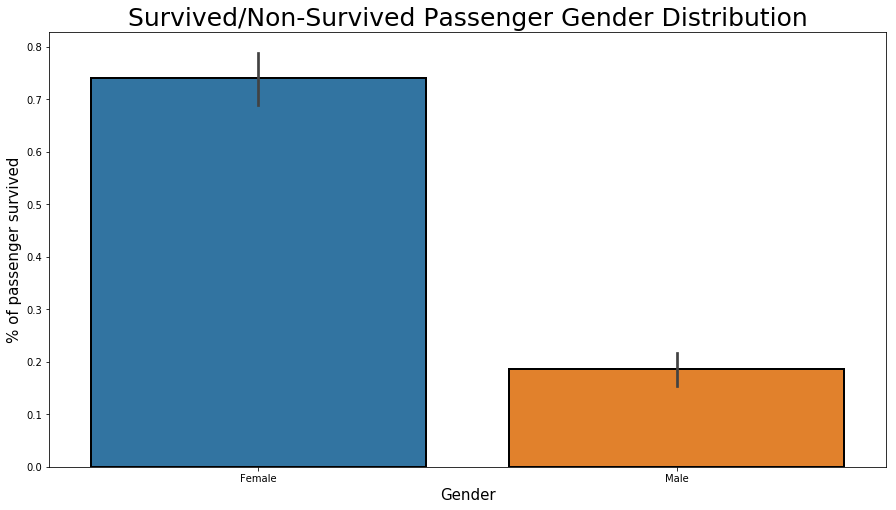

In [17]:
plt.subplots(figsize = (15,8))
sns.barplot(x = "Sex", y = "Survived", data=train_df, edgecolor=(0,0,0), linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(train_df.Sex.unique()), labels)

# 1 is for male and 0 is for female.

This bar plot above shows the distribution of female and male survived. The x_label shows gender and the y_label shows % of passenger survived. This bar plot shows that 74% female passenger survived while only ~19% male passenger survived.

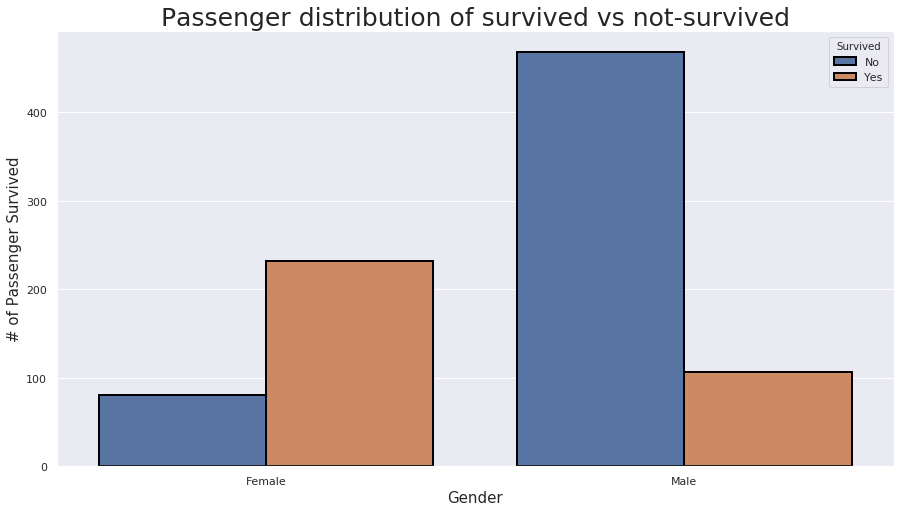

In [18]:
sns.set(style='darkgrid')
plt.subplots(figsize = (15,8))
ax=sns.countplot(x='Sex',data=train_df,hue='Survived',edgecolor=(0,0,0),linewidth=2)
train_df.shape
## Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived',fontsize=25)
plt.xlabel('Gender',fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']
#Fixing xticks.
plt.xticks(sorted(train_df.Survived.unique()),labels)
## Fixing legends
leg = ax.get_legend()
leg.set_title('Survived')
legs=leg.texts
legs[0].set_text('No')
legs[1].set_text('Yes')


This count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

**Summary**
- As we suspected, female passengers have survived at a much better rate than male passengers.
- It seems about right since females and children were the priority.

<a id="section403"></a>
#### 4.3 Pclass and Survived

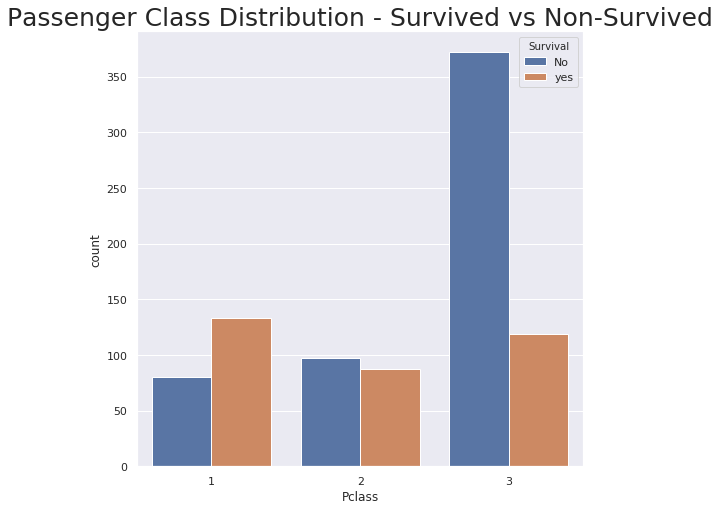

In [19]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  63% first class passenger survived titanic tragedy, while
-  48% second class and
-  only 24% third class passenger survived.

([<matplotlib.axis.XTick at 0x7f43e7275208>,
 <a list of 3 Text xticklabel objects>)

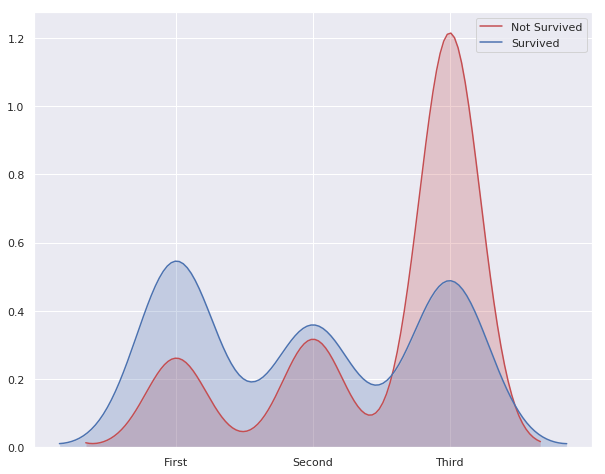

In [20]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df.Pclass.unique()),labels)

This kde plot is pretty self explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that in, the plot; the third class passengers have survived more than second class passnegers. It is true since there were a lot more third class passengers than first and second.



**Summary**

First class passenger had the upper hand during the tragedy than second and third class passengers. You can probably agree with me more on this, when we look at the distribution of ticket fare and survived column.

<a id="section404"></a>
#### 4.4 Fare and Survived

Text(0.5, 0, 'Fare')

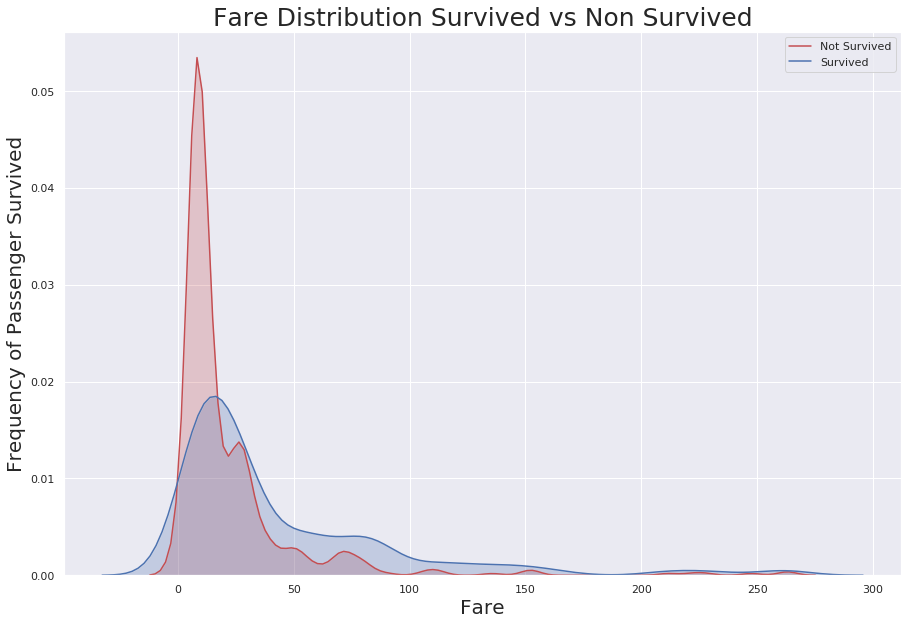

In [21]:
plt.subplots(figsize=(15,10))

ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'],color='r',shade=True,label='Not Survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'],color='b',shade=True,label='Survived' )
plt.title('Fare Distribution Survived vs Non Survived',fontsize=25)
plt.ylabel('Frequency of Passenger Survived',fontsize=20)
plt.xlabel('Fare',fontsize=20)

In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


<a id="section405"></a>
#### 4.5 Age and Survived

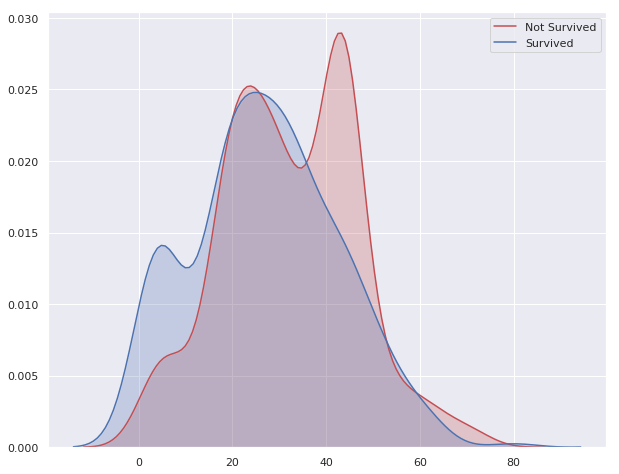

In [23]:
#fig,axs=plt.subplots(nrows=2)
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.kdeplot(train_df.loc[(train_df['Survived']==0),'Age'],color='r',shade=True,label='Not Survived')
sns.kdeplot(train_df.loc[(train_df['Survived']==1),'Age'],color='b',shade=True,label='Survived')


There is nothing out of the ordinary of about this plot, except the very left part of the distribution. It shows that

children and infants were the priority.

<a id="section5"></a>
### 5. Feature Engineering

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


<a id="section501"></a>
#### 5.1 family_size feature

In [25]:
## Family_size seems like a good feature to create
train_df['family_size'] = train_df.SibSp + train_df.Parch+1
test_df['family_size'] = test_df.SibSp + test_df.Parch+1


In [26]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train_df['family_group'] = train_df['family_size'].map(family_group)
test_df['family_group'] = test_df['family_size'].map(family_group)

<a id="section502"></a>
#### 5.2 Is_alone feature

In [27]:
train_df['is_alone'] = [1 if i<2 else 0 for i in train_df.family_size]
test_df['is_alone'] = [1 if i<2 else 0 for i in test_df.family_size]

<a id="section503"></a>

#### 5.3 Child feature

In [28]:
## We are going to create a new feature "age" from the Age feature. 
train_df['child'] = [1 if i<16 else 0 for i in train_df.Age]
test_df['child'] = [1 if i<16 else 0 for i in test_df.Age]
train_df.child.value_counts()

0    769
1    119
Name: child, dtype: int64

<a id="section504"></a>
#### 5.4 fare feature

In [29]:
train_df.head()
#test_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family_size,family_group,is_alone,child
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,small,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,small,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,loner,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,2,small,0,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,1,loner,1,0


<a id="section505"></a>
#### 5.5 Calculated_fare feature

In [30]:
train_df['calculated_fare'] = train_df.Fare/train_df.family_size
test_df['calculated_fare'] = test_df.Fare/test_df.family_size


In [31]:
train_df.calculated_fare.mean()

18.54129191972815

In [32]:
train_df.calculated_fare.mode()

0    13.0
dtype: float64

In [33]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a


In [34]:
train_df['fare_group'] = train_df['calculated_fare'].map(fare_group)
test_df['fare_group'] = test_df['calculated_fare'].map(fare_group)

<a id="section506"></a>
#### 5.6 Creating dummy variables

In [35]:
train_df = pd.get_dummies(train_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Title',"Pclass",'Embarked', 'family_group', 'fare_group'], drop_first=True)
train_df.drop(['Cabin', 'family_size','Ticket','Name', 'Fare'], axis=1, inplace=True)
test_df.drop(['Ticket','Name','family_size',"Fare",'Cabin'], axis=1, inplace=True)


In [36]:
pd.options.display.max_columns = 99


In [37]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        

In [38]:
train_df['age_group'] = train_df['Age'].map(age_group_fun)
test_df['age_group'] = test_df['Age'].map(age_group_fun)

In [39]:
train_df = pd.get_dummies(train_df,columns=['age_group'], drop_first=True)
test_df = pd.get_dummies(test_df,columns=['age_group'], drop_first=True)
#Lets try all after dropping few of the column.
train_df.drop(['Age','calculated_fare'],axis=1,inplace=True)
test_df.drop(['Age','calculated_fare'],axis=1,inplace=True)

In [40]:
#age=pd.cut(data_df['Age'],4)
#data_df['Age2']=label.fit_transform(age)
#fare=pd.cut(data_df['Fare'],4)
#data_df['Fare2']=label.fit_transform(fare)
#train_df['Age']=data_df['Age2'][:891]
#train_df['Fare']=data_df['Fare2'][:891]
#test_df['Age']=data_df['Age2'][891:]
#test_df['Fare']=data_df['Fare2'][891:]
#train_df = pd.get_dummies(train_df,columns=['Age','Fare'], drop_first=True)
#test_df = pd.get_dummies(test_df,columns=['Age','Fare'], drop_first=True)
#print(test_df.shape)
#print(train_df.shape)
train_df.head()

train_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)
test_df.drop(['Title_Rev','age_group_old','age_group_teenager','age_group_senior_citizen','Embarked_Q'],axis=1,inplace=True)

<a id="section6"></a>
### 6. Model Creation

* I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- K-Nearest Neighbors(KNN)
 -  and many other.....
 


In [41]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
#testing = test_df.copy()
#testing.shape

<a id="section601"></a>
#### 6.1 Classifier Comparision

By Classifier Comparison we choose which model best for the given data.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    CatBoostClassifier(),
    XGBClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


#### Important Note:

- If you're facing an error to see the result of below code cell, It's because there is a lot of __calcualation__ is taking place as multiple algorithms are running so for that I suggest get this notebook to edit mode and try to run cell by cell.

- I am commenting two of the below code cells as they are taking a lot of notebook space, but i want you guys try to run them from your side. 

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit


# SSplit=StratifiedShuffleSplit(test_size=0.3,random_state=7)
# acc_dict = {}

# for train_index,test_index in SSplit.split(X,y):
#     X_train,X_test=X.iloc[train_index],X.iloc[test_index]
#     y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
#     for clf in classifiers:
#         name = clf.__class__.__name__
          
#         clf.fit(X_train,y_train)
#         predict=clf.predict(X_test)
#         acc=accuracy_score(y_test,predict)
#         if name in acc_dict:
#             acc_dict[name]+=acc
#         else:
#             acc_dict[name]=acc


In [44]:

# log['Classifier']=acc_dict.keys()
# log['Accuracy']=acc_dict.values()
# #log.set_index([[0,1,2,3,4,5,6,7,8,9]])
# %matplotlib inline
# sns.set_color_codes("muted")
# ax=plt.subplots(figsize=(10,8))
# ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
# ax.set_xlabel('Accuracy',fontsize=20)
# plt.ylabel('Classifier',fontsize=20)
# plt.grid(color='r', linestyle='-', linewidth=0.5)
# plt.title('Classifier Accuracy',fontsize=20)


> __Result after running the above code cell__

![](https://raw.githubusercontent.com/vikramvinay/Titanic-Machine-Learning-from-Disaster/master/download.png)

From the above barplot, we can clearly see that the following classifiers are good-
- LogisticRegression
- XGBClassifier
- AdaBoostClassifier
- GradiendBoostingClassifier 
- LDA

** Note**

The spliting of the test and train data is randomly done so possibility of getting different set of Best classifier that may be differ from mine one.


But While you running multiple time one a general scale. The given set of classifier used in this kernal are proved to be good one.
## Edit: 4/30/2019
- Recently i got comment regarding using __Cataboost algorithm__. As over in the barplot we can see catboost also doing great so this time we gonna use cataboost for final submission.

__Time to train every model with further hyperparameter tunning extension__

In [45]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

**Scaling features**

**Why scaling** : [Check my kernel on importance of scaling](https://www.kaggle.com/vin1234/why-feature-scaling-is-important)

In [46]:

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
testframe = std_scaler.fit_transform(test_df)
testframe.shape


(418, 23)

**GridSearch**

Using the GridSearch ,Lets find out the most suitable parameter/hyperparmeter which gives the best result.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)

<a id="section602"></a>
#### 6.2 LogisticRegression

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8258426966292135
[[91 11]
 [20 56]]
0.835820895522388
0.7368421052631579


**Grid Search on Logistic Regression**

In [49]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True), n_jobs=1,scoring='accuracy')

In [50]:
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 0.5, 'penalty': 'l2'}
0.828169014084507
LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
#grid.best_estimator_.fit(X_train,y_train)
#predict=grid.best_estimator_.predict(X_test)
#print(accuracy_score(y_test,predict))
logreg_grid = LogisticRegression(penalty=grid.best_params_['penalty'], C=grid.best_params_['C'])
logreg_grid.fit(X_train,y_train)
y_pred = logreg_grid.predict(X_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.826
[[91 11]
 [20 56]]
0.835820895522388
0.7368421052631579


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<a id="section603"></a>
#### 6.3 AdaBoostClassifer

In [52]:
ABC=AdaBoostClassifier()

ABC.fit(X_train,y_train)
predict=ABC.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))


0.8146067415730337
[[89 13]
 [20 56]]
0.8115942028985508


**GridSearch on AdaBoostClassifer**

In [53]:
from sklearn.tree import DecisionTreeClassifier
n_estimator=[50,60,100,150,200,300]
learning_rate=[0.001,0.01,0.1,0.2,]
hyperparam={'n_estimators':n_estimator,'learning_rate':learning_rate}
gridBoost=GridSearchCV(ABC,param_grid=hyperparam,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1,scoring='accuracy')

In [54]:
gridBoost.fit(X_train,y_train)
print(gridBoost.best_score_)
print(gridBoost.best_estimator_)

0.8183098591549296
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=60, random_state=None)


In [55]:
gridBoost.best_estimator_.fit(X_train,y_train)
predict=gridBoost.best_estimator_.predict(X_test)
print(accuracy_score(y_test,predict))


0.8202247191011236


<a id="section604"></a>
#### 6.4 XGBClassifier

In [56]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,nthread=-1,subsample=1,colsample_bytree=0.8)
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8258426966292135
[[94  8]
 [23 53]]
0.8688524590163934
0.6973684210526315


In [57]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict=lda.predict(X_test)
print(accuracy_score(y_test,predict))
print(precision_score(y_test,predict))
print(recall_score(y_test,predict))

0.8426966292134831
0.875
0.7368421052631579


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


<a id="section605"></a>
#### 6.5 DecisionTree Classifier

In [58]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( criterion="entropy",
                                 max_depth=5,
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.009,
                                random_state=2000)
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.809
[[89 13]
 [21 55]]
0.8088235294117647
0.7236842105263158


<a id="section606"></a>
#### 6.6 Random Forest Classifier


In [59]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import precision_score,recall_score,confusion_matrix
#randomforest = RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_split=6, min_samples_leaf=4)
##randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
#randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
#random_accy = round(accuracy_score(y_pred, y_test), 3)
#print (random_accy)
#print(confusion_matrix(y_test,y_pred))
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=20,max_features=0.2, min_samples_leaf=8,random_state=20)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


0.843
0.875
0.7368421052631579
[[94  8]
 [20 56]]


<a id="section607"></a>
#### 6.7 Bagging Classifier


In [60]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred = BaggingClassifier.predict(X_test)
bagging_accy = round(accuracy_score(y_pred, y_test), 3)
print(bagging_accy)

0.82


<a id="section608"></a>
#### 6.8 Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg',logreg), 
    ('random_forest', randomforest),
    ('decision_tree',dectree), 
    ('XGB Classifier', xgb),
    ('BaggingClassifier', BaggingClassifier)])
voting_classifier.fit(X_train,y_train)
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.826


In [62]:
#y_predict=randomforest.predict(testframe)

In [63]:
# Prediction with catboost algorithm.
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=False, one_hot_max_size=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc = round(accuracy_score(y_pred, y_test), 3)
print(acc)

0.815


In [64]:
y_predict=model.predict(testframe)

<a id="section7"></a>
### 7. Submit test predictions

The given parameter is used in the  model  is found through grid search which is not shown in the code .

As it took a lot long to run .

In [65]:
temp = pd.DataFrame(pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": y_predict
    }))


temp.to_csv("../working/submission3.csv", index = False)

**This kernel is still under process for further improvement.**

I will always incorporate new concepts of data science as I master them. This journey of learning is worth sharing as well as collaborating. So share your ideas and let's make this notebook best __to get the start for every beginner__... 

- Any comments about further improvements to the kernel would be genuinely appreciated.
- Feel free to raise any doubt in the comment section regarding the kernel.

**Hope you find it useful.** 

**If this notebook helped you in anyway, Then do <font color="red">Follow </font> and  <font color="blue">upvote!</font>**

<img src="https://steemitimages.com/640x0/http://i0.kym-cdn.com/photos/images/original/000/662/100/aff.jpg" height=500 width=500/>